In [1]:
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
rcParams.update({'figure.autolayout': True})

  


## Descriptive Stats ##

In [2]:

data = pd.read_csv("conversion_project.csv")
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [12]:
print(data.groupby(['country']).size())

country
China       76602
Germany     13055
UK          48449
US         178092
dtype: int64


In [13]:
print(data.groupby(['source']).size())

source
Ads        88739
Direct     72420
Seo       155039
dtype: int64


In [14]:
# check the outliers
print(data[data['age']>110])

Empty DataFrame
Columns: [country, age, new_user, source, total_pages_visited, converted]
Index: []


In [15]:
data = data[data['age']<110]

Check the Segments with low conversion rate and get a sense of the data

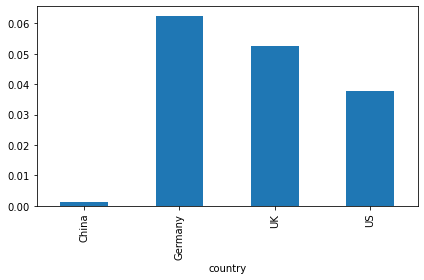

In [16]:
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

<BarContainer object of 58 artists>

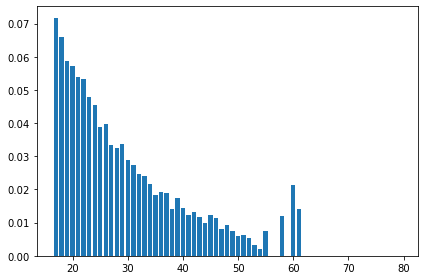

In [17]:
age_bin=data.groupby(['age'])['converted'].mean()
age_bin=age_bin.reset_index()
plt.bar(age_bin.age, age_bin.converted)

(array([4.0739e+04, 4.3868e+04, 0.0000e+00, 4.3829e+04, 0.0000e+00,
        4.1046e+04, 0.0000e+00, 3.6308e+04, 3.0261e+04, 0.0000e+00,
        2.3488e+04, 0.0000e+00, 1.7522e+04, 0.0000e+00, 1.2157e+04,
        0.0000e+00, 8.0730e+03, 5.3940e+03, 0.0000e+00, 3.6150e+03,
        0.0000e+00, 2.4250e+03, 0.0000e+00, 1.8110e+03, 1.3240e+03,
        0.0000e+00, 1.1000e+03, 0.0000e+00, 8.4500e+02, 0.0000e+00,
        7.2200e+02, 0.0000e+00, 5.6500e+02, 4.0500e+02, 0.0000e+00,
        2.9600e+02, 0.0000e+00, 1.8000e+02, 0.0000e+00, 1.1300e+02,
        0.0000e+00, 4.6000e+01, 3.9000e+01, 0.0000e+00, 1.7000e+01,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 1.  ,  1.56,  2.12,  2.68,  3.24,  3.8 ,  4.36,  4.92,  5.48,
         6.04,  6.6 ,  7.16,  7.72,  8.28,  8.84,  9.4 ,  9.96, 10.52,
        11.08, 11.64, 12.2 , 12.76, 13.32, 13.88, 14.44, 15.  , 15.56,
        16.12, 16.68, 17.24, 17.8 , 18.36, 18.92, 19.48, 20.04, 20.6 ,
        21.16, 21.72, 22.28, 22.84

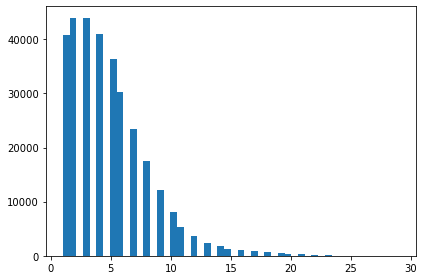

In [18]:
plt.hist(data['total_pages_visited'],bins=50)

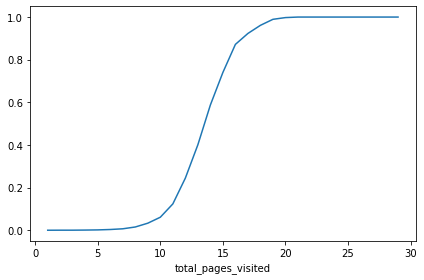

In [19]:
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

In [20]:
data.corr()

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


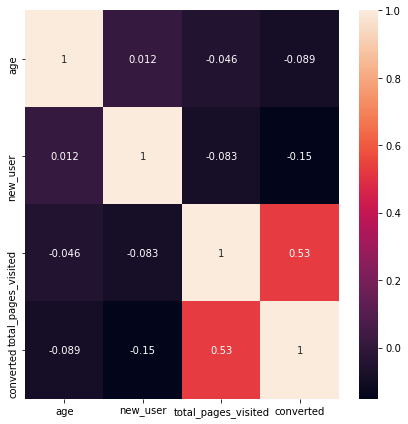

In [22]:
ax = plt.figure(figsize=(6,6))
ax = sns.heatmap(data.corr(),annot=True)

## Machine Learning ##

In [23]:
#dummy variables for the categorical ones
data_dummy = pd.get_dummies(data,drop_first=True)

In [24]:
data_dummy .head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0,1,0,0,0
1,23,1,5,0,0,0,1,0,1
2,28,1,4,0,0,0,1,0,1
3,39,1,5,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,1


In [25]:
data_dummy.columns

Index(['age', 'new_user', 'total_pages_visited', 'converted', 'country_Germany', 'country_UK', 'country_US', 'source_Direct', 'source_Seo'], dtype='object')

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(4684)
  
#split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)
  
#build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop('converted', axis=1), train['converted'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.9838851885571901 
 OOB Confusion Matrix 
         0     1
0  200872  1102
1    2261  4455


In [28]:
#and let's print test accuracy and confusion matrix
test_data = test.drop('converted', axis=1)
test_pred = rf.predict(test_data)
print(
"Test accuracy is", rf.score(test_data,test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], test_pred, labels=[0, 1]))
)


Test accuracy is 0.9847360196450496 
 Test Set Confusion Matrix 
         0     1
0  103483   543
1    1098  2384


In [29]:
#different kinds of metrics
from sklearn.metrics import f1_score,classification_report, plot_confusion_matrix
print(classification_report(test['converted'],test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    104026
           1       0.81      0.68      0.74      3482

    accuracy                           0.98    107508
   macro avg       0.90      0.84      0.87    107508
weighted avg       0.98      0.98      0.98    107508



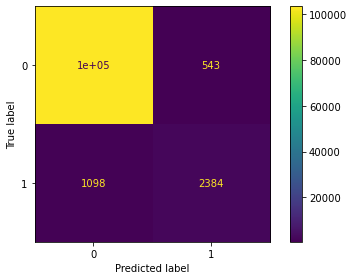

In [30]:
plot_confusion_matrix(rf,test_data,test['converted'])

In [31]:
test_pred_prob = rf.predict_proba(test_data)
test_pred_prob_pos = test_pred_prob[:,1]
test_pred_prob_pos

array([0., 0., 0., ..., 0., 0., 0.])

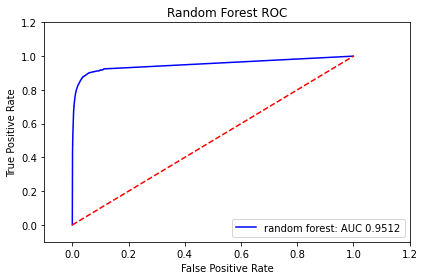

In [32]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test['converted'].values, test_pred_prob_pos, pos_label = 1)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='%s: AUC %0.4f'% ('random forest',roc_auc))
  

plt.title('Random Forest ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

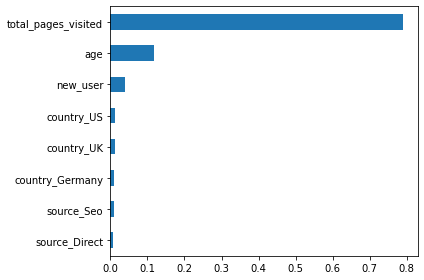

In [33]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()


In [34]:
#build the model without total_pages_visited
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:10})
rf.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])
  
#let's print OOB accuracy and confusion matrix
print(
"OOB accuracy is", 
rf.oob_score_, 
"\n", 
"OOB Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(train['converted'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
)

OOB accuracy is 0.889827016148354 
 OOB Confusion Matrix 
         0      1
0  182720  19254
1    3738   2978


In [35]:
#and let's print test accuracy and confusion matrix
print(
"Test accuracy is", rf.score(test.drop(['converted', 'total_pages_visited'], axis=1),test['converted']), 
"\n", 
"Test Set Confusion Matrix", 
"\n",
pd.DataFrame(confusion_matrix(test['converted'], rf.predict(test.drop(['converted', 'total_pages_visited'], axis=1)), labels=[0, 1]))
)


Test accuracy is 0.8899802805372623 
 Test Set Confusion Matrix 
        0     1
0  94140  9886
1   1942  1540


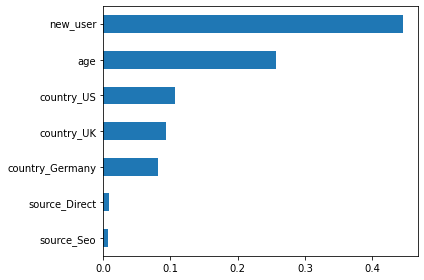

In [36]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['converted', 'total_pages_visited'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()


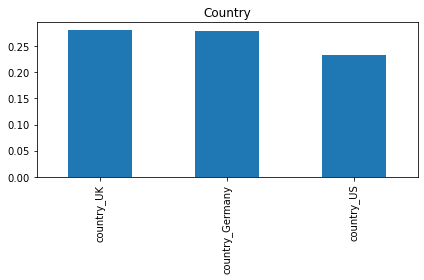

In [37]:
from pdpbox import pdp, info_plots
  
#country
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()


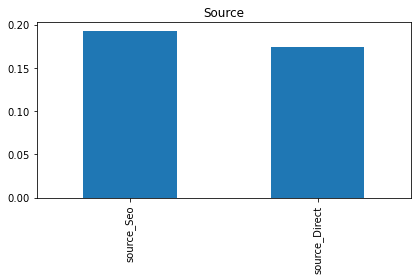

In [38]:
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature=['source_Direct', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Source')
plt.show()

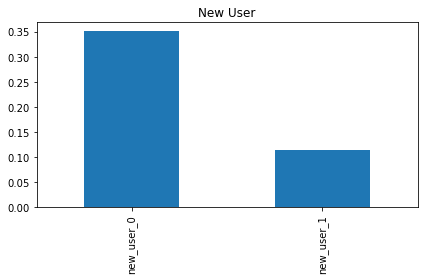

In [39]:
#new user
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='New User')
plt.show()


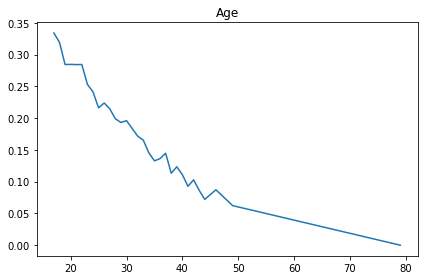

In [40]:
#age
pdp_iso = pdp.pdp_isolate( model=rf, 
                          dataset=train.drop(['converted', 'total_pages_visited'], axis=1),      
                          model_features=list(train.drop(['converted', 'total_pages_visited'], axis=1)), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot(title='Age')
plt.show()

This shows that:

Users with an old account are much better than new users

Germany, UK, and US are similar, with Germany being the best. Most importantly, they all have very very high values. We could read this as relative to the reference level, which is China. So this means that not being from China and being from any of those 3 countries significantly increases the probability of conversion. That is, China is very bad for conversion

The site works very well for young people and gets worse for >30 yr old

Source is less relevant



graphviz并不是Anaconda自带的,所以import graphviz之前需要安装graphviz。<br>
安装graphviz需要运行以下语句：<br>
pip install graphviz <br>
conda install python-graphviz<br>
以下代码最后生成一个tree conversation 的PDF，PDF文件已经发到答案的压缩包中了。

In [41]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
  
tree = DecisionTreeClassifier( max_depth=2,class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(train.drop(['converted', 'total_pages_visited'], axis=1), train['converted'])
  
#visualize it
export_graphviz(tree, out_file="tree_conversion.dot", feature_names=train.drop(['converted', 'total_pages_visited'], axis=1).columns, proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
  
s = Source.from_file("tree_conversion.dot")
s.view()


'tree_conversion.dot.pdf'

Conclusions and next steps:




The site is working very well for young users. Definitely let’s tell marketing to advertise and use channels which are more likely to reach young people.

The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.

Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.

Maybe go through the UI and figure out why older users perform so poorly? From ~30 y/o conversion clearly starts dropping. A good actionable metric here is conversion rate for people >=30 yr old. Building a team whose goal is to increase that number would be interesting.

Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, or maybe some payment issue. Given how many users are based in China, fixing this should be a top priority. Huge opportunity.


As you can see, product ideas usually end up being about:

Identify segments that perform well, but have low absolute count (like Germany). Then tell marketing to get more of those people

Tell product to fix the experience for the bad performing ones

Bad performing segments with high absolute count (like China) usually provide the biggest opportunities for massive gains, if you can guess why that’s happening and then build a test to validate your hypothesis